In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
DATA_FILE = '../data/birth_life_2010.txt'

In [3]:
batch_size = 10
n_epoch = 100

In [4]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [5]:
# Step 1: read in data from the .txt file
data, n_samples = read_birth_life_data(DATA_FILE)

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

In [7]:
dataset = dataset.shuffle(1000).repeat().batch(10)

In [8]:
X, Y = dataset.make_one_shot_iterator().get_next()

In [9]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [10]:
# Step 4: build model to predict Y
hypothesis = w * X + b 

In [11]:
# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.reduce_mean(tf.square(Y - hypothesis), name='loss')

In [12]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [15]:
writer = tf.summary.FileWriter('./graphs/linear_reg_dataset_1', tf.get_default_graph())
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    total_batch = int(n_samples/batch_size)
    
    # Step 8: train the model for 100 epochs
    for i in range(n_epoch): 
        total_loss = 0
        for j in range(total_batch):
            # Session execute optimizer and fetch values of loss
            #_, l = sess.run([optimizer, loss], feed_dict={X: x_data, Y:y_data}) 
            _, l = sess.run([optimizer, loss]) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/total_batch))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 

Epoch 0: 1716.9947124280427
Epoch 1: 1128.474201403166
Epoch 2: 986.3588642321134
Epoch 3: 850.4404120194284
Epoch 4: 743.3644666169819
Epoch 5: 659.2314597681949
Epoch 6: 565.8328182822779
Epoch 7: 499.1652028937089
Epoch 8: 432.52640573601974
Epoch 9: 373.20952325118213
Epoch 10: 333.88165283203125
Epoch 11: 291.0982360839844
Epoch 12: 257.3748044465718
Epoch 13: 227.2499855443051
Epoch 14: 201.45311335513466
Epoch 15: 179.3404002942537
Epoch 16: 158.93802682976974
Epoch 17: 141.4131212736431
Epoch 18: 127.6948272303531
Epoch 19: 113.7375572606137
Epoch 20: 102.6696444059673
Epoch 21: 95.39081372712788
Epoch 22: 85.12134592156661
Epoch 23: 78.4971042432283
Epoch 24: 71.69119985480057
Epoch 25: 66.26685674566971
Epoch 26: 60.413225776270814
Epoch 27: 57.71287877936112
Epoch 28: 54.43870684975072
Epoch 29: 50.465915629738255
Epoch 30: 48.01580740276136
Epoch 31: 46.3398235722592
Epoch 32: 43.7047398215846
Epoch 33: 42.51297960783306
Epoch 34: 39.27475813815468
Epoch 35: 39.633818375436

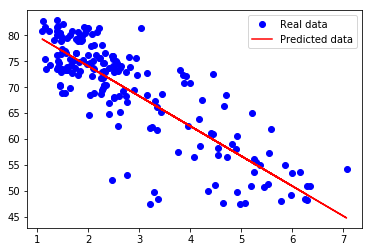

In [16]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()